<a href="https://colab.research.google.com/github/luixmartins/data-science-projects/blob/main/steam_game_review_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STEAM GAME REVIEW CLASSIFICATION 

In this notebook we'll only perform the task of classifying the texts. 
To consult the exploratory analysis of the data, you can access my other work that is available in this same repository. 

* Analysis and visualization of data information: [Steam game review analysis](https://github.com/luixmartins/data-science-projects/blob/main/steam-game-review/starter-eda-steam-game-review.ipynb)

<br>
For the classification text we'll use a new proposal for creating a Bag of Words(BoW), the bertVectorizer algorithm. 

You can access the documentation at: [bertVectorizer documentation](https://github.com/ivanfilhoreis/bertVectorizer) 

In [1]:
!pip install git+https://github.com/ivanfilhoreis/bertVectorizer.git -q
!pip install -U sentence-transformers -q

    Running setup.py install for bertVectorizer ... done
  DEPRECATION: bertVectorizer was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.
     |████████████████████████████████| 79 kB 3.6 MB/s 
     |████████████████████████████████| 3.8 MB 7.3 MB/s 
     |████████████████████████████████| 1.2 MB 36.4 MB/s 
     |████████████████████████████████| 67 kB 4.9 MB/s 
     |████████████████████████████████| 6.5 MB 37.2 MB/s 
     |████████████████████████████████| 596 kB 49.1 MB/s 
     |████████████████████████████████| 895 kB 38.7 MB/s 


### Import necessary librarys / Data visualization 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import collections 
from google.colab import data_table
from bertVectorizer import bertVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score, train_test_split 
from sklearn.metrics import confusion_matrix, classification_report 

%matplotlib inline 

data_table.enable_dataframe_formatter()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
path = 'https://raw.githubusercontent.com/luixmartins/data-science-projects/main/steam-game-review/steam_game_review.csv'
df = pd.read_csv(path)

df.sample(5)

,review_id,title,year,user_review,user_suggestion
5711,8086,DCS World Steam Edition,2018.0,"Don't let my hours fool you, I've been well an...",1
11794,17291,Bless Online,2018.0,Early Access ReviewDO NOT BUY THIS GAME!!!!!Li...,0
16759,24728,Cuisine Royale,2018.0,"Early Access ReviewAmazing game, absolutely lo...",1
12776,18273,RaceRoom Racing Experience,2014.0,This Is So Hard To Steer I don't Get it? DONT ...,0
10349,15757,theHunter Classic,2014.0,A quite frankly fantastic hunting game that de...,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


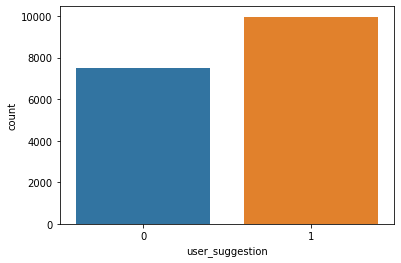

In [11]:
import seaborn as sns 

sns.countplot(df.user_suggestion)

## Creating Bag of Words 

In [16]:
data = df[['user_review', 'user_suggestion']].copy()
data.rename({'user_review': 'text', 'user_suggestion': 'label'}, inplace=True, axis=1)

data.head()

,text,label
0,I'm scared and hearing creepy voices. So I'll...,1
1,"Best game, more better than Sam Pepper's YouTu...",1
2,"A littly iffy on the controls, but once you kn...",1
3,"Great game, fun and colorful and all that.A si...",1
4,Not many games have the cute tag right next to...,1


In [ ]:
vectorizer = bertVectorizer() 
bag_of_word = vectorizer.fit_transform(data)

bag_of_word 

### CONTINUE DEVELOPMENT
